Notebook for https://github.com/leferrad/pyoselm

In [1]:
from pyoselm import OSELMRegressor, OSELMClassifier
from sklearn.datasets import load_digits, make_regression 
from sklearn.model_selection import train_test_split



import seaborn as sns
from sklearn.metrics import confusion_matrix

import math

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Train score of total: 0.7902777777777777
Test score of total: 0.7569060773480663


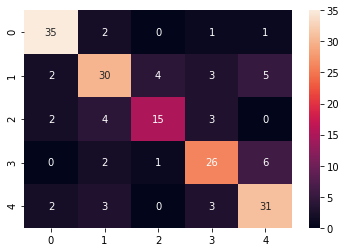

In [9]:
oselmc = OSELMClassifier(n_hidden=20, activation_func='sigmoid', random_state=123)
# Data
X, y = load_digits(n_class=5, return_X_y=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Sequential learning
# The first batch of data must have the same size as n_hidden to achieve the first phase (boosting)
batches_x = [X_train[:oselmc.n_hidden]] + [[x_i] for x_i in X_train[oselmc.n_hidden:]]
batches_y = [y_train[:oselmc.n_hidden]] + [[y_i] for y_i in y_train[oselmc.n_hidden:]]

for b_x, b_y in zip(batches_x, batches_y):
    oselmc.fit(b_x, b_y)

y_pred = oselmc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print("Train score of total: %s" % str(oselmc.score(X_train, y_train)))
print("Test score of total: %s" % str(oselmc.score(X_test, y_test)))

In [7]:
def metrics(true,predicted):
    CM = confusion_matrix(predicted, true)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
    p = TP / (TP + FP)
    r = TP / (TP + FN)
    a = (TP + TN) / (TP + TN + FP + FN)
    f1 = ( 2*( p*r )) / (p + r)
    print("Precision =",p)
    print("Recall =",r)
    print("Accuracy =",a)
    print("F1 =",f1)


def LeferradOSELM(hidden,X,y):
    oselmc = OSELMClassifier(n_hidden=100, activation_func='sigmoid', random_state=123)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    # Sequential learning
    # The first batch of data must have the same size as n_hidden to achieve the first phase (boosting)
    batches_x = [X_train[:oselmc.n_hidden]] + [[x_i] for x_i in X_train[oselmc.n_hidden:]]
    batches_y = [y_train[:oselmc.n_hidden]] + [[y_i] for y_i in y_train[oselmc.n_hidden:]]

    for b_x, b_y in zip(batches_x, batches_y):
        oselmc.fit(b_x, b_y)

    y_pred = oselmc.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    metrics(y_test,y_pred)
    #print("Train score of total: %s" % str(oselmc.score(X_train, y_train)))
    #print("Test score of total: %s" % str(oselmc.score(X_test, y_test)))

    

In [3]:
path = "../datasets/"

,length,diameter,height,weight.w,weight.s,weight.v,weight.sh,rings,sex
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,2


Precision = 0.4688995215311005
Recall = 0.5130890052356021
Accuracy = 0.5612903225806452
F1 = 0.49


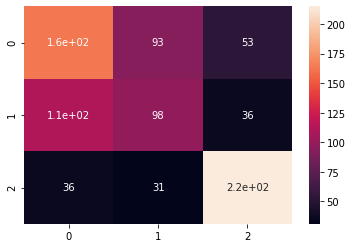

In [8]:
#ABALONE DATASET
dataset = "Abalone.csv"
raw = pd.read_csv(path + dataset, header=0, skiprows=[1])
map = {'M':0,'F':1,'I':2}
raw = raw.replace({'sex':map})
display(raw.head(5))
y = raw["sex"].to_numpy()
raw.drop(['sex'],inplace=True,axis=1)
X = raw.to_numpy()

LeferradOSELM(50,X,y)



,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


Precision = 1.0
Recall = 0.8571428571428571
Accuracy = 0.9411764705882353
F1 = 0.923076923076923


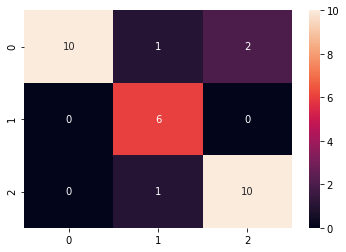

In [9]:
#IRIS DATASET
dataset = "iris.csv"
raw = pd.read_csv(path + dataset, header=0, skiprows=[1])
raw.species.unique()
map = {'setosa':0,'versicolor':1,'virginica':2}
raw = raw.replace({'species':map})
display(raw.head(5))
y = raw["species"].to_numpy()
raw.drop(['species'],inplace=True,axis=1)
X = raw.to_numpy()

LeferradOSELM(50,X,y)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0


Precision = 1.0
Recall = 0.8007303077725613
Accuracy = 0.8007303077725613
F1 = 0.8893395133256082


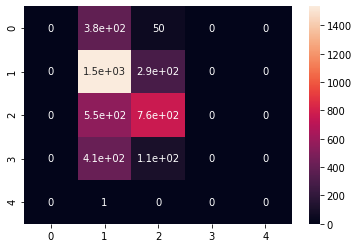

In [10]:
#HS DATASET
dataset = "hs.csv"
raw = pd.read_csv(path + dataset, header=0, skiprows=[1])
m = {'NEAR BAY':0,'<1H OCEAN':1,'INLAND':2,'NEAR OCEAN':3,'ISLAND':4}
raw = raw.replace({'ocean_proximity':m})
display(raw.head(5))

y = raw["ocean_proximity"].to_numpy()
raw.drop(["ocean_proximity"],inplace=True,axis=1)
X = raw.to_numpy()

LeferradOSELM(50,X,y)

Precision = 1.0
Recall = 0.6428571428571429
Accuracy = 0.7058823529411765
F1 = 0.782608695652174


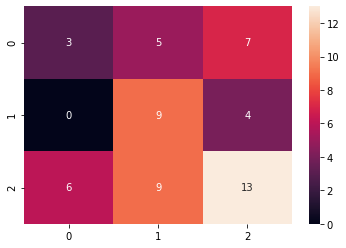

In [11]:
#POKEMON DATASET 

data = pd.read_csv('../datasets/Pokemon.csv')
data = data.set_index("#")

d = {}
for i in range(len(data["Type 2"].unique())):
  d[data["Type 2"].unique()[i]] = i + 1
data = data.drop(columns = ["Name"])
data = data.fillna(0)
data["Type 2"] = data["Type 2"].replace(d)


data_balanced = data[(data["Type 1"] == "Water") | (data["Type 1"] == "Normal") | (data["Type 1"] == "Grass")]

X = data_balanced.values[:,1:]
y = data_balanced.values[:,0]

LeferradOSELM(50,X,y)